<a href="https://colab.research.google.com/github/sahilkumar0511/Superstore_Sales_Prediction/blob/main/Superstore_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Superstore.csv', encoding = 'windows-1252')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,02/01/2014,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,03/01/2014,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,03/01/2014,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,03/01/2014,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,03/01/2014,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,9/30/2017,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,9/30/2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,9/30/2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,9/30/2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ship Mode        9994 non-null   object 
 1   Segment          9994 non-null   object 
 2   City             9994 non-null   object 
 3   State            9994 non-null   object 
 4   Postal Code      9994 non-null   int64  
 5   Region           9994 non-null   object 
 6   Category         9994 non-null   object 
 7   Sub-Category     9994 non-null   object 
 8   Sales            9994 non-null   float64
 9   Quantity         9994 non-null   int64  
 10  Discount         9994 non-null   float64
 11  Profit           9994 non-null   float64
 12  Order Date_year  9994 non-null   int64  
 13  Ship Date_year   9994 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 1.1+ MB


In [4]:
df = df.drop(['Row ID', 'Country', 'Product ID', 'Product Name', 'Order ID', 'Customer Name','Customer ID'], axis = 1)
df

,Order Date,Ship Date,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,02/01/2014,11-11-2016,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,03/01/2014,11-11-2016,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,03/01/2014,6/16/2016,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,03/01/2014,10/18/2015,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,03/01/2014,10/18/2015,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9/30/2017,1/23/2014,Second Class,Consumer,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,9/30/2017,03-03-2017,Standard Class,Consumer,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,9/30/2017,03-03-2017,Standard Class,Consumer,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,9/30/2017,03-03-2017,Standard Class,Consumer,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [5]:
df['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

<ipython-input-15-0a9d1a20fb34>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=df.corr()


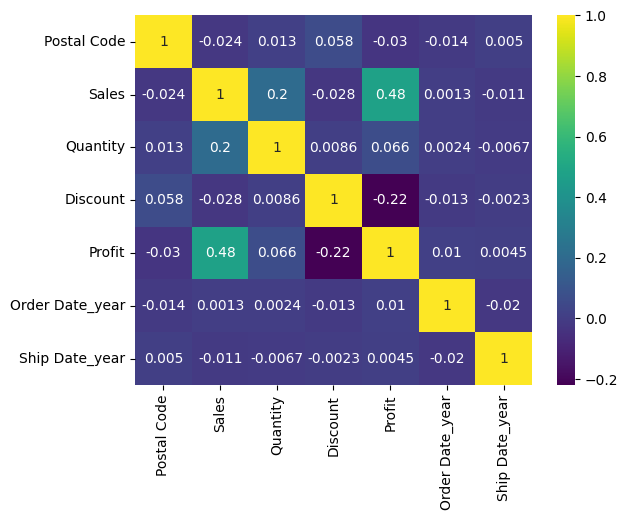

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

data=df.corr()
sns.heatmap(data,annot=True,cmap='viridis')
%matplotlib inline

In [7]:
df.groupby('Region').mean()

<ipython-input-7-c3b9009a4f2c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Region').mean()


,Postal Code,Sales,Quantity,Discount,Profit
Region,,,,,
Central,65340.572536,215.772661,3.779595,0.240353,17.092709
East,17616.466994,238.336110,3.728230,0.145365,32.135808
South,34490.772840,241.803645,3.832716,0.147253,28.857673
West,91707.696534,226.493233,3.829535,0.109335,33.849032


In [8]:
df.groupby('Ship Mode').mean()

<ipython-input-8-815e0f8bed18>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Ship Mode').mean()


,Postal Code,Sales,Quantity,Discount,Profit
Ship Mode,,,,,
First Class,54765.611834,228.497024,3.701560,0.164610,31.839948
Same Day,57536.082873,236.396179,3.609576,0.152394,29.266591
Second Class,55626.009254,236.089239,3.816452,0.138895,29.535545
Standard Class,54944.447051,227.583067,3.819873,0.160023,27.494770


In [9]:
df.groupby('Segment').mean()

<ipython-input-9-3dc7e5cf6c2c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Segment').mean()


,Postal Code,Sales,Quantity,Discount,Profit
Segment,,,,,
Consumer,55649.895781,223.733644,3.760547,0.158141,25.836873
Corporate,54482.228477,233.823300,3.843709,0.158228,30.456667
Home Office,55051.998317,240.972041,3.782389,0.147128,33.818664


In [23]:
df.groupby('Category').mean()

<ipython-input-23-558f0a78610d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Category').mean()


,Postal Code,Sales,Quantity,Discount,Profit,Order Date_year,Ship Date_year
Category,,,,,,,
Furniture,55726.556341,349.834887,3.785007,0.173923,8.699327,2015.718529,2015.728430
Office Supplies,54890.951211,119.324101,3.801195,0.157285,20.327050,2015.717059,2015.738135
Technology,55551.572279,452.709276,3.756903,0.132323,78.752002,2015.743368,2015.745533


In [13]:
def encode_dates(df, column):
    df = df.copy()
    df[column] = pd.to_datetime(df[column])
    df[column + '_year'] = df[column].apply(lambda x: x.year)
    df = df.drop(column, axis=1)
    return df

def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [14]:
df = encode_dates(df, column='Order Date')

<ipython-input-13-46c43d17c1c0>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df[column] = pd.to_datetime(df[column])


In [36]:
df = df.drop(['Ship Mode', 'Segment', 'City', 'State', 'Postal Code', 'Region','Sub-Category'], axis = 1)
df

,Category,Sales,Quantity,Discount,Profit,Order Date_year,Ship Date_year
0,Furniture,261.9600,2,0.00,41.9136,2014,2016
1,Furniture,731.9400,3,0.00,219.5820,2014,2016
2,Office Supplies,14.6200,2,0.00,6.8714,2014,2016
3,Furniture,957.5775,5,0.45,-383.0310,2014,2015
4,Office Supplies,22.3680,2,0.20,2.5164,2014,2015
...,...,...,...,...,...,...,...
9989,Furniture,25.2480,3,0.20,4.1028,2017,2014
9990,Furniture,91.9600,2,0.00,15.6332,2017,2017
9991,Technology,258.5760,2,0.20,19.3932,2017,2017
9992,Office Supplies,29.6000,4,0.00,13.3200,2017,2017


In [37]:
df.columns

Index(['Category', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Order Date_year', 'Ship Date_year'],
      dtype='object')

In [38]:
for column in ['Category']:
  df = onehot_encode(df, column=column)

In [39]:
df

,Sales,Quantity,Discount,Profit,Order Date_year,Ship Date_year,Category_Furniture,Category_Office Supplies,Category_Technology
0,261.9600,2,0.00,41.9136,2014,2016,1,0,0
1,731.9400,3,0.00,219.5820,2014,2016,1,0,0
2,14.6200,2,0.00,6.8714,2014,2016,0,1,0
3,957.5775,5,0.45,-383.0310,2014,2015,1,0,0
4,22.3680,2,0.20,2.5164,2014,2015,0,1,0
...,...,...,...,...,...,...,...,...,...
9989,25.2480,3,0.20,4.1028,2017,2014,1,0,0
9990,91.9600,2,0.00,15.6332,2017,2017,1,0,0
9991,258.5760,2,0.20,19.3932,2017,2017,0,0,1
9992,29.6000,4,0.00,13.3200,2017,2017,0,1,0


In [40]:
X = df.drop('Sales', axis=1)
Y = df['Sales']

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)
X_train.shape

(7995, 8)

In [42]:
X_train.describe()

,Quantity,Discount,Profit,Order Date_year,Ship Date_year,Category_Furniture,Category_Office Supplies,Category_Technology
count,7995.000000,7995.000000,7995.000000,7995.000000,7995.000000,7995.000000,7995.000000,7995.000000
mean,3.808380,0.156503,28.570204,2015.723577,2015.744966,0.211007,0.604628,0.184365
std,2.238037,0.206574,229.553088,1.125428,1.122082,0.408049,0.488961,0.387806
min,1.000000,0.000000,-6599.978000,2014.000000,2014.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,1.799750,2015.000000,2015.000000,0.000000,0.000000,0.000000
50%,3.000000,0.200000,8.685500,2016.000000,2016.000000,0.000000,1.000000,0.000000
75%,5.000000,0.200000,28.796400,2017.000000,2017.000000,0.000000,1.000000,0.000000
max,14.000000,0.800000,6719.980800,2017.000000,2018.000000,1.000000,1.000000,1.000000


In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns= X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [45]:
X_train.describe()

,Quantity,Discount,Profit,Order Date_year,Ship Date_year,Category_Furniture,Category_Office Supplies,Category_Technology
count,7.995000e+03,7.995000e+03,7.995000e+03,7.995000e+03,7.995000e+03,7.995000e+03,7.995000e+03,7.995000e+03
mean,3.777119e-17,-1.066481e-17,1.710813e-17,-2.137272e-14,5.818363e-14,8.887339e-17,6.221137e-18,-6.932124e-17
std,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00
min,-1.254919e+00,-7.576602e-01,-2.887769e+01,-1.531582e+00,-1.555212e+00,-5.171442e-01,-1.236634e+00,-4.754355e-01
25%,-8.080711e-01,-7.576602e-01,-1.166272e-01,-6.429754e-01,-6.639554e-01,-5.171442e-01,-1.236634e+00,-4.754355e-01
50%,-3.612231e-01,2.105782e-01,-8.662897e-02,2.456310e-01,2.273010e-01,-5.171442e-01,8.086469e-01,-4.754355e-01
75%,5.324729e-01,2.105782e-01,9.854379e-04,1.134237e+00,1.118557e+00,-5.171442e-01,8.086469e-01,-4.754355e-01
max,4.554105e+00,3.115294e+00,2.915155e+01,1.134237e+00,2.009814e+00,1.933696e+00,8.086469e-01,2.103335e+00


In [111]:
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential
inputs = tf.keras.Input(shape =(X_train.shape[1],))
x = tf.keras.layers.Dense(32, activation='relu')(inputs)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='linear')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense_54 (Dense)            (None, 32)                288       
                                                                 
 dense_55 (Dense)            (None, 32)                1056      
                                                                 
 dense_56 (Dense)            (None, 64)                2112      
                                                                 
 dense_57 (Dense)            (None, 64)                4160      
                                                                 
 dense_58 (Dense)            (None, 1)                 65        
                                                                 
Total params: 7,681
Trainable params: 7,681
Non-trainable p

In [112]:
model.compile(optimizer='adam', loss='mse')
history = model.fit(
    X_train,
    Y_train,
    validation_data=(X_test,Y_test),
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        ),
        tf.keras.callbacks.ReduceLROnPlateau()
    ]
)

Epoch 1/100
250/250 [==============================] - 2s 3ms/step - loss: 311623.0938 - val_loss: 161591.1250 - lr: 0.0010
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 176344.8281 - val_loss: 110379.6172 - lr: 0.0010
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 150457.9531 - val_loss: 108128.7188 - lr: 0.0010
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 145952.6406 - val_loss: 93871.4375 - lr: 0.0010
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 141748.3438 - val_loss: 90509.7031 - lr: 0.0010
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 135778.5469 - val_loss: 104761.4297 - lr: 0.0010
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 132116.9688 - val_loss: 87765.9766 - lr: 0.0010
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 129577.9453 - val_loss: 81345.3203 - lr: 0.0010
Epoch 9/100


In [113]:
test_loss = model.evaluate(X_test,Y_test, verbose=0)
print("Test Loss: {:.5f}".format(test_loss))

Test Loss: 55239.85547


In [114]:
from sklearn.metrics import r2_score
y_pred = np.squeeze(model.predict(X_test))
test_r2 = r2_score(Y_test, y_pred)
print("Test R^2 Score: {:.5f}".format(test_r2))

63/63 [==============================] - 0s 1ms/step
Test R^2 Score: 0.85655
